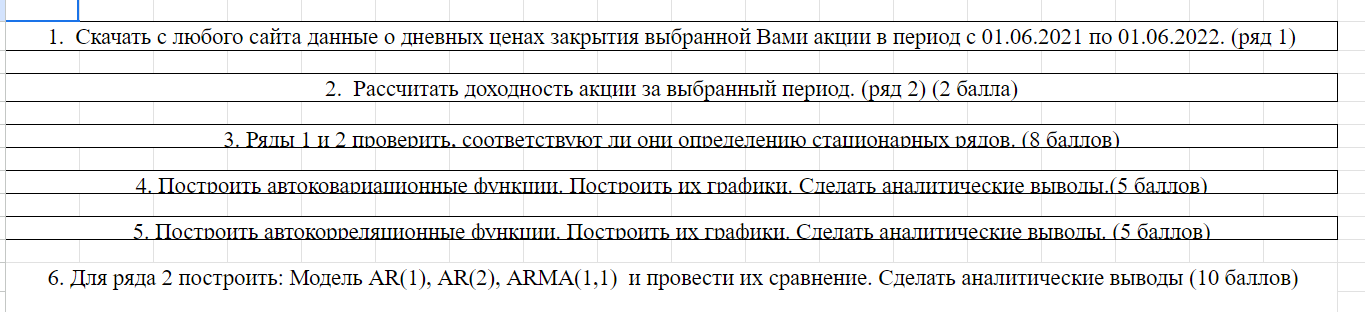

In [ ]:
# Данный прототип относится к вариантам [11, 14, 19, 22, 25]

VARIANT = 11

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
# другой вариант для ARIMA
import itertools
from pmdarima import auto_arima
%matplotlib inline

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00


## Задание №1

**Скачать с любого сайта данные о дневных ценах закрытия выбранной Вами акции в период с 01.06.2021 по 01.06.2022. (ряд 1)**


In [ ]:
YNDX = pd.read_csv(
    "YNDX.csv",
    delimiter=';',
    parse_dates=['<DATE>'])

YNDX = YNDX[['<DATE>', '<CLOSE>']]
#YNDX['<DATE>'] = pd.to_datetime(YNDX['<DATE>'], infer_datetime_format=True) # альтернативный способ преобразования в даты
#YNDX.set_index(['<DATE>'], inplace = True)
YNDX

,<DATE>,<CLOSE>
0,2021-06-01,4933.0
1,2021-06-02,4948.0
2,2021-06-03,4901.8
3,2021-06-04,4923.4
4,2021-06-07,4911.4
...,...,...
228,2022-05-26,1670.0
229,2022-05-27,1644.0
230,2022-05-30,1597.6
231,2022-05-31,1567.8


In [ ]:
YNDX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   233 non-null    datetime64[ns]
 1   <CLOSE>  233 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [ ]:
fig = px.line(YNDX, x="<DATE>", y="<CLOSE>", width=950, height=600, title='Стоимость акций Yandex')

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

# рисуем вертикальные линии для разделения по месяцам
start_date = YNDX['<DATE>'][0]
dates = [start_date] * 11
for i in range(0, 11):
    dates[i] += np.timedelta64(i+1, 'M')

for date in dates:
    fig.add_vline(x=date, line_width=1, line_dash="solid", line_color="black")

fig.show()

In [ ]:
fig = px.box(YNDX, y="<CLOSE>")

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

выбросов нет

##Задание №2

**Рассчитать доходность акции за выбранный период. (ряд 2) (2 балла)**

In [ ]:
daily_returns_1 = YNDX['<CLOSE>'].pct_change()
YNDX['Returns'] = daily_returns_1
YNDX.dropna(how = 'any', inplace = True)
YNDX

,<DATE>,<CLOSE>,Returns
1,2021-06-02,4948.0,0.003041
2,2021-06-03,4901.8,-0.009337
3,2021-06-04,4923.4,0.004407
4,2021-06-07,4911.4,-0.002437
5,2021-06-08,4889.6,-0.004439
...,...,...,...
228,2022-05-26,1670.0,0.038557
229,2022-05-27,1644.0,-0.015569
230,2022-05-30,1597.6,-0.028224
231,2022-05-31,1567.8,-0.018653


In [ ]:
fig = px.scatter(YNDX, x='<DATE>', y='Returns', title="Распределение доходностей за 1 год")

fig.show()

###Видим, что наши доходности в основном около нуля собраны, есть некоторые выбросы, но они минимальны. Приведем также гистограммы.

In [ ]:
fig = px.histogram(YNDX, x="Returns", nbins=100)
fig.update_layout(bargap=0.1)
fig.show()

###Как мы видим, наше наблюдение подтвердилось.

###**Доходности распредлены нормально.**

## Задание №3

**Ряды 1 и 2 проверить, соответствуют ли они определению стационарных рядов. (8 баллов)**

In [ ]:
# Проведем тест Дикки-Фуллера

test = sm.tsa.adfuller(YNDX['Returns'])

print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])

if test[0] > test[4]['5%']:
    print('\nряд не стационарен')
else:
    print('\nряд стационарен')

adf:  -14.330989002599344
p-value:  1.0999718772183487e-26
Critical values:  {'1%': -3.4589796764641, '5%': -2.8741347158661448, '10%': -2.573482381701992}

Единичных корней нет, ряд стационарен


In [ ]:
# Проведем тест Дикки-Фуллера

test = sm.tsa.adfuller(YNDX['<CLOSE>'][1:])

print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])

if test[0] > test[4]['5%']:
    print('\nряд не стационарен')
else:
    print('\nряд стационарен')

adf:  0.6335179899004962
p-value:  0.9884133030497084
Critical values:  {'1%': -3.459105583381277, '5%': -2.8741898504150574, '10%': -2.5735117958412097}

Есть единичные корни, ряд не стационарен


##Вывод: ряд доходности является стационарным, а ряд закрытия свечей не стационарен

##Задание №4

**Построить автоковариационные функции. Построить их графики. Сделать аналитические выводы.(5 баллов)**

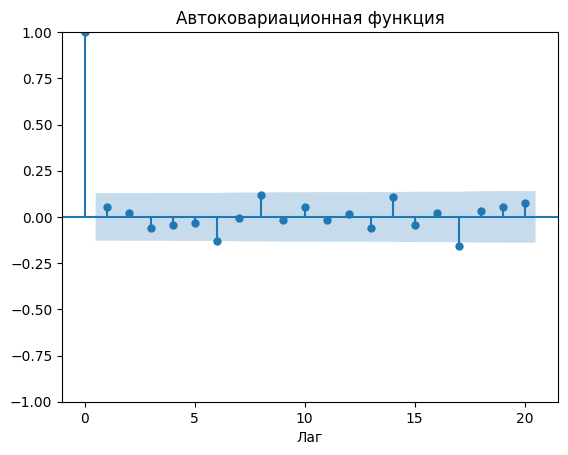

In [ ]:
# Построение автоковариационной функции
plot_acf(YNDX['Returns'], lags=20)
plt.xlabel('Лаг')
plt.title('Автоковариационная функция')
plt.show()

Воспользуемся методом разности Метод разности (Differencing) - метод, который заключается в вычитании каждого значения ряда из предыдущего значения. Это позволяет убрать тренд и сезонность в данных. Можно применять разности нескольких порядков, чтобы получить стационарный ряд.

In [ ]:
YNDX_diff = YNDX.diff().dropna()

YNDX_diff

,<DATE>,<CLOSE>,Returns
2,1 days,-46.2,-0.012378
3,1 days,21.6,0.013744
4,3 days,-12.0,-0.006844
5,1 days,-21.8,-0.002001
6,1 days,83.4,0.021495
...,...,...,...
228,1 days,62.0,0.027236
229,1 days,-26.0,-0.054126
230,3 days,-46.4,-0.012655
231,1 days,-29.8,0.009571


In [ ]:
# Проведем тест Дикки-Фуллера

test = sm.tsa.adfuller(YNDX_diff['Returns'])

print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])

if test[0] > test[4]['5%']:
    print('\nЕсть единичные корни, ряд не стационарен')
else:
    print('\nЕдиничных корней нет, ряд стационарен')

adf:  -7.94040992450941
p-value:  3.3256310226977064e-12
Critical values:  {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}

Единичных корней нет, ряд стационарен


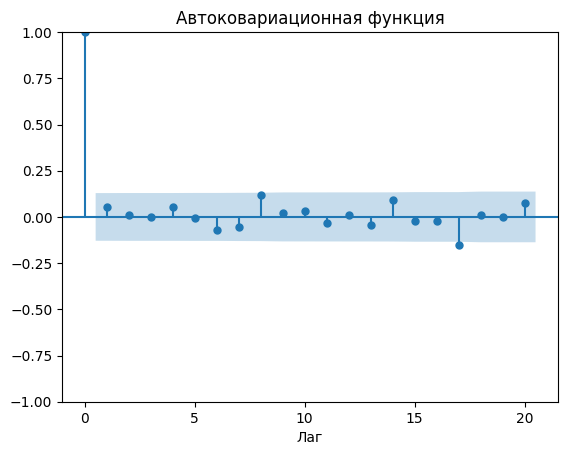

In [ ]:
# Построение автоковариационной функции
plot_acf(YNDX_diff['<CLOSE>'], lags=20)
plt.xlabel('Лаг')
plt.title('Автоковариационная функция')
plt.show()

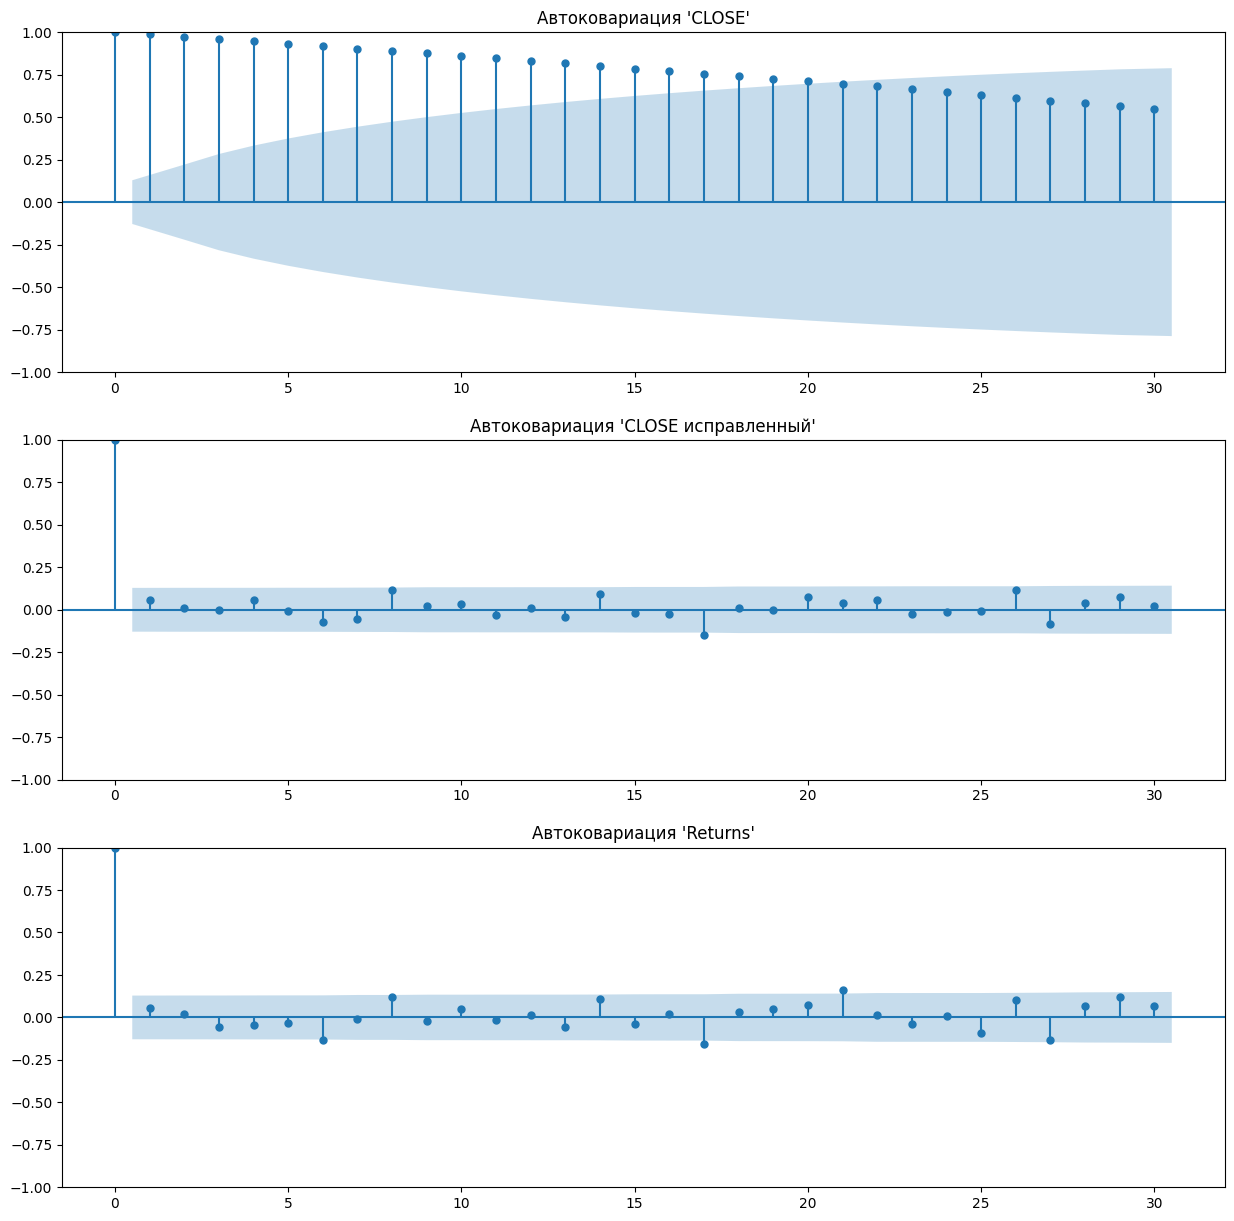

In [ ]:
lags = 30

fig, ax = plt.subplots(3, figsize=(15, 15))

plot_acf(YNDX['<CLOSE>'], ax=ax[0], lags=lags)
ax[0].set_title(f"Автоковариация \'CLOSE\'")

plot_acf(YNDX_diff['<CLOSE>'], ax=ax[1], lags=lags)
ax[1].set_title(f"Автоковариация \'CLOSE исправленный\'")

plot_acf(YNDX['Returns'].dropna(), ax=ax[2], lags=lags)
ax[2].set_title(f"Автоковариация \'Returns\'")

plt.show()

ACF - функция которая показывает корреляцию между наблюденимем во временном ряду и его логированными значениями

из графика ACF можем получить параметр q для построения ARIMA модели

## Задание №5

**Построить автокорреляционные функции. Построить их графики. Сделать аналитические выводы. (5 баллов)**

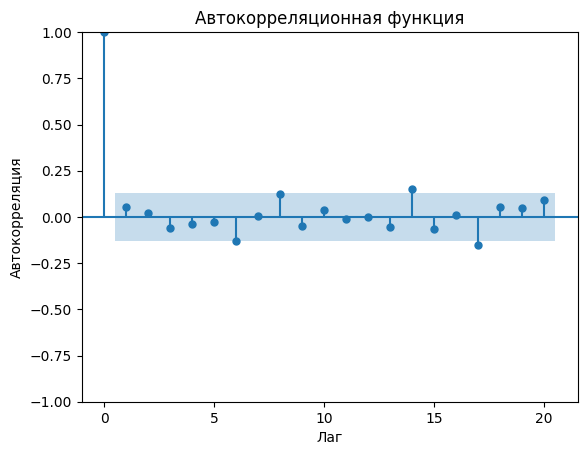

In [ ]:
n = len(YNDX['Returns'])
plot_pacf(YNDX['Returns'], lags=20)
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляционная функция')
plt.show()

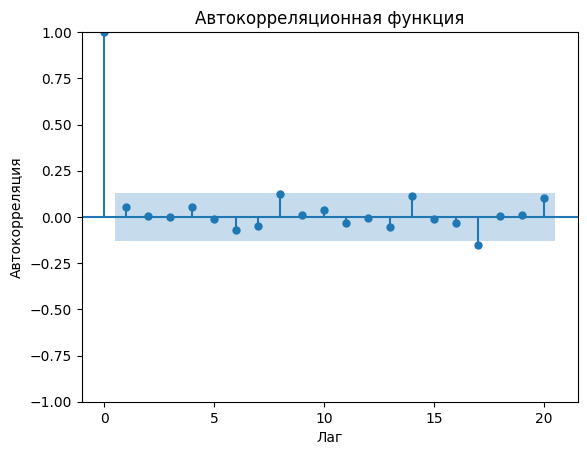

In [ ]:
n = len(YNDX_diff['<CLOSE>'])
plot_pacf(YNDX_diff['<CLOSE>'], lags=20)
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляционная функция')
plt.show()

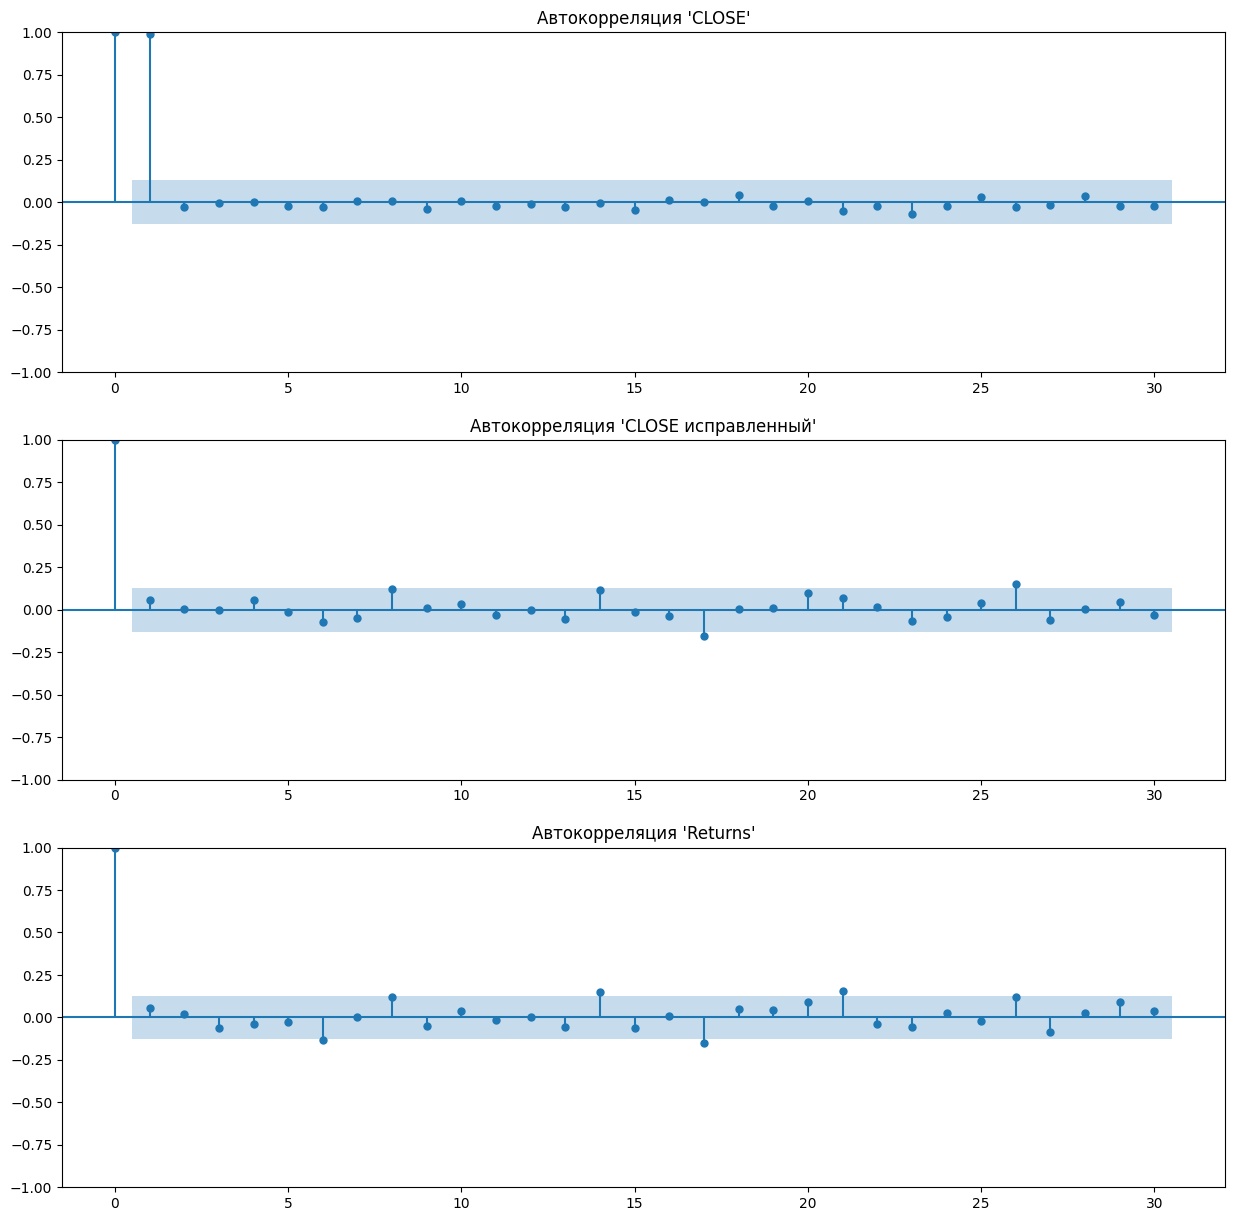

In [ ]:
lags = 30

fig, ax = plt.subplots(3, figsize=(15, 15))

plot_pacf(YNDX['<CLOSE>'], ax=ax[0], lags=lags)
ax[0].set_title(f"Автокорреляция \'CLOSE\'")

plot_pacf(YNDX_diff['<CLOSE>'], ax=ax[1], lags=lags)
ax[1].set_title(f"Автокорреляция \'CLOSE исправленный\'")

plot_pacf(YNDX['Returns'].dropna(), ax=ax[2], lags=lags)
ax[2].set_title(f"Автокорреляция \'Returns\'")

plt.show()

PACF - частный случай ACF, показывает прямую корреляцию между наблюденимем во временном ряду и его логированными значениями, но при этом исключает влияние промежуточных лагов

из графика PACF можем получить параметр p для построения ARIMA модели

## Задание №6

**Для ряда 2 построить: Модель AR(1), AR(2), ARMA(1,1)  и провести их сравнение. Сделать аналитические выводы (10 баллов)**

лучший определить по критерию Шварца и критерию Акайки

In [ ]:
new_column_names = {
    '<DATE>': 'Date',
    '<CLOSE>': 'Close',
}

YNDX.rename(columns=new_column_names, inplace=True)
YNDX_for_models = YNDX.set_index('Date')

YNDX_for_models

,Close,Returns
Date,,
2021-06-02,4948.0,0.003041
2021-06-03,4901.8,-0.009337
2021-06-04,4923.4,0.004407
2021-06-07,4911.4,-0.002437
2021-06-08,4889.6,-0.004439
...,...,...
2022-05-26,1670.0,0.038557
2022-05-27,1644.0,-0.015569
2022-05-30,1597.6,-0.028224


In [ ]:
# Построение модели AR
ar1_model = ARIMA(YNDX_for_models['Returns'], order = (1,0,0)).fit()  # Порядок модели AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# Вывод информации о модели
print(ar1_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  232
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 431.100
Date:                Tue, 12 Sep 2023   AIC                           -856.200
Time:                        19:56:22   BIC                           -845.859
Sample:                             0   HQIC                          -852.029
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.003     -1.205      0.228      -0.011       0.003
ar.L1          0.0541      0.076      0.709      0.478      -0.095       0.204
sigma2         0.0014   4.11e-05     34.677      0.0

смотрим на критерии AIC и BIC

In [ ]:
# Построение модели AR
ar2_model = ARIMA(YNDX_for_models['Returns'], order = (2,0,0)).fit()  # Порядок модели AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# Вывод информации о модели
print(ar2_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  232
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 431.141
Date:                Tue, 12 Sep 2023   AIC                           -854.281
Time:                        20:00:28   BIC                           -840.494
Sample:                             0   HQIC                          -848.721
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.004     -1.110      0.267      -0.011       0.003
ar.L1          0.0532      0.077      0.695      0.487      -0.097       0.203
ar.L2          0.0189      0.043      0.443      0.6

In [ ]:
arma_model = ARIMA(YNDX_for_models['Returns'], order = (1,0,1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  232
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 431.089
Date:                Tue, 12 Sep 2023   AIC                           -854.178
Time:                        20:11:35   BIC                           -840.391
Sample:                             0   HQIC                          -848.618
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.004     -1.131      0.258      -0.011       0.003
ar.L1          0.0132      0.900      0.015      0.988      -1.750       1.777
ma.L1          0.0390      0.883      0.044      0.9

In [ ]:
ar1_model.aic

-856.1995006302104

In [ ]:
aic_list = [ar1_model.aic, ar2_model.aic, arma_model.aic]
model_list = ['ar1', 'ar2','arma11']

In [ ]:
data = pd.DataFrame({'ar1' : [ar1_model.aic, ar1_model.bic],'ar2' : [ar2_model.aic, ar2_model.bic], 'arma11' : [arma_model.aic, arma_model.bic]}, index = ['aic','bic'])
data

,ar1,ar2,arma11
aic,-856.199501,-854.281214,-854.177879
bic,-845.859289,-840.494265,-840.390929


по информационному критерию Акайки, лучшей моделью оказалось модель ar1, так как ее значение AIC оказалось минимальным

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=YNDX_for_models["Returns"], mode='lines+markers', name='Исходный ряд (%)'),
)

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=ar1_model.fittedvalues, mode='lines+markers', name='AR_1'),
)

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=ar2_model.fittedvalues, mode='lines+markers', name='AR_2'),
)

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=arma_model.fittedvalues, mode='lines+markers', name='ARMA'),
)


fig.update_layout(height=700, width=1500, title_text=f"Сравнение предсказаний моделей")
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=ar1_model.fittedvalues, mode='lines+markers', name='AR_1'),
)

fig.update_layout(height=700, width=1500, title_text=f"Модель AR1")
fig.show()

## Задание №7. ARMA, ARIMA

**Для ряда цен построить ARIMA, для ряда доходностей ARMA, выбор параметров обосновать. <br>
Построить прогнозы по моделям на 5 периодов вперед и сравнить с фактическими значениями. <br>
Сделать выводы о прогнозных способностях моделей. <br>
Провести их сравнение. <br>
Сделать аналитические выводы. (20 баллов)**

================================================================================

Проведем выбор параметров (p, d ,q) для **цен закрытия** на основе анализа графиков автокорреляций

P: На графике частичной автокорреляции светло-синяя область показывает значимое пороговое значение, а каждая вертикальная линия указывает значения PACF в каждой временной точке. Таким образом, на графике значимыми считаются только вертикальные линии, которые выходят за пределы светло-синей области. Мы можем видеть, что отставание PACF (Partial Autocorrelation) 0 является значительным, поскольку оно значительно выше светло-синей линии. Итак, мы установим значение p = 0.

D: d = 1 так как понадобился один период в функции df['Close'].diff(periods=1) для достижения стационарности

Q: Аналогичным методом, как в выборе p, воспользуемся для выбора q. В данном случае у нас светло-синяя область показывает значимое пороговое значение. Мы можем видеть, что отставание ACF (Autocorrelation) 1 является значительным, поскольку оно значительно выше светло-синей линии. Итак, мы установим значение q = 1.

Как итог: **(0, 1, 1)**

In [ ]:
def get_best_params(target, mode="ARIMA"):
    p = range(0, 10)
    d = range(0, 3)
    q = range(0, 3)

    pdq = list(itertools.product(p, d, q))   # все комбинации

    best_pdq = (0, 0, 0)
    best_aic = np.inf
    for params in pdq:
        if mode == 'ARMA' and params[1] != 0:
            continue
        result_test = ARIMA(target, order=params).fit()
        if result_test.aic < best_aic:
            best_pdq = params
            best_aic = result_test.aic

    print(f'Показатели (p, d, q) лучшей модели {mode}: {best_pdq}\nПоказатель AIC лучшей модели: {best_aic}')
    return best_pdq

In [ ]:
print("Лучшие показатели для ряда цен")
arima_params = get_best_params(YNDX_for_models['Close'], mode='ARIMA')

Лучшие показатели для ряда цен


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

Показатели (p, d, q) лучшей модели ARIMA: (0, 2, 1)
Показатель AIC лучшей модели: 2906.1446280584905


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Показатели (p, d, q) лучшей модели ARIMA: (0, 2, 1)
#### Показатель AIC лучшей модели: 2906.1446280584905

In [ ]:
target = YNDX_for_models['Close']
stepwise_fit = auto_arima(target, trace=False, suppress_warnings=True)
print("Лучшие параметры для CLOSE с помощью ARIMA")
stepwise_fit

Лучшие параметры для CLOSE с помощью ARIMA


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
ARIMA_model = ARIMA(YNDX_for_models['Close'], order=arima_params).fit()

print(ARIMA_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  232
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1451.072
Date:                Tue, 12 Sep 2023   AIC                           2906.145
Time:                        20:48:02   BIC                           2913.021
Sample:                             0   HQIC                          2908.918
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9797      0.017    -59.129      0.000      -1.012      -0.947
sigma2      1.741e+04    539.762     32.263      0.000    1.64e+04    1.85e+04
Ljung-Box (L1) (Q):                   0.30   Jarque-

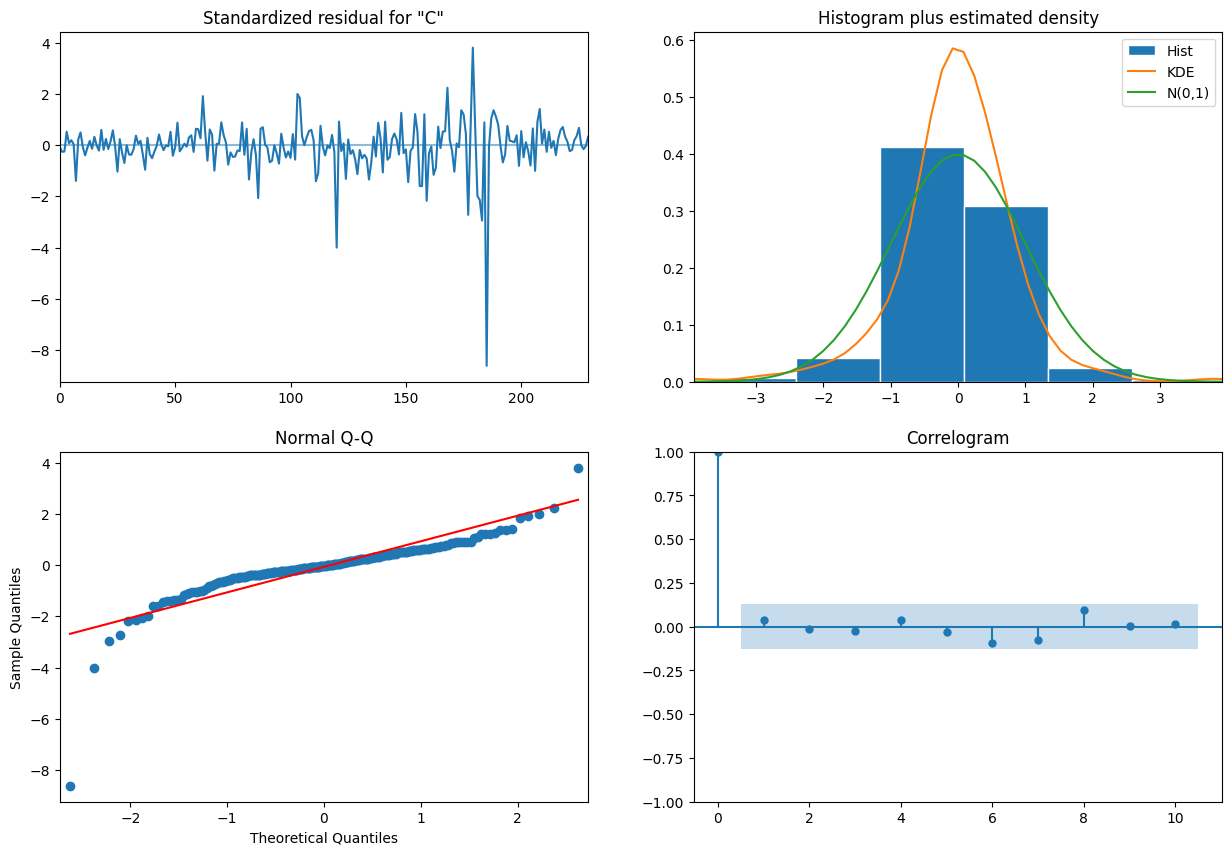

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=YNDX_for_models["Close"], mode='lines', name='Исходный ряд цен'),
)

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=ARIMA_model.predict(), mode='lines', name='ARIMA predict'),
)


fig.update_layout(height=700,
                  width=1000,
                  margin=dict(l=20, r=20, t=30, b=20),
                  paper_bgcolor="LightSteelBlue",
                  title_text=f"Сравнение исходных цен и предсказания модели ARIMA{arima_params}"
)
fig.show()

Проведем выбор параметров (p, d ,q) для **ряда доходностей** на основе анализа графиков автокорреляций

P: На графике частичной автокорреляции светло-синяя область показывает значимое пороговое значение, а каждая вертикальная линия указывает значения PACF в каждой временной точке. Таким образом, на графике значимыми считаются только вертикальные линии, которые выходят за пределы светло-синей области. Мы можем видеть, что отставание PACF (Partial Autocorrelation) 0 является значительным, поскольку оно значительно выше светло-синей линии. Итак, мы установим значение p = 0.

D: d = 0 так как ряд уже стационарен.

Q: Аналогичным методом, как в выборе p, воспользуемся для выбора q. В данном случае у нас светло-синяя область показывает значимое пороговое значение. Мы можем видеть, что отставание ACF (Autocorrelation) 0 является значительным, поскольку оно значительно выше светло-синей линии. Итак, мы установим значение q = 0.

Как итог: **(0, 0, 0)**

In [ ]:
print("Лучшие показатели для ряда доходностей")
arma_params = get_best_params(YNDX_for_models['Returns'].dropna(), mode='ARMA')

Лучшие показатели для ряда доходностей


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

Показатели (p, d, q) лучшей модели ARMA: (0, 0, 0)
Показатель AIC лучшей модели: -857.5231012261687


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Показатели (p, d, q) лучшей модели ARMA: (0, 0, 0)
#### Показатель AIC лучшей модели: -857.5231012261687

In [ ]:
target = YNDX_for_models['Returns'].dropna()
stepwise_fit = auto_arima(target, trace=False, suppress_warnings=True)
print("Лучшие параметры для RETURNS с помощью ARMA")
stepwise_fit

Лучшие параметры для RETURNS с помощью ARMA


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
ARMA_model = ARIMA(YNDX_for_models['Returns'].dropna(), order=arma_params).fit()

print(ARMA_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  232
Model:                          ARIMA   Log Likelihood                 430.762
Date:                Tue, 12 Sep 2023   AIC                           -857.523
Time:                        20:56:44   BIC                           -850.630
Sample:                             0   HQIC                          -854.743
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.003     -1.282      0.200      -0.010       0.002
sigma2         0.0014   3.83e-05     37.250      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.69   Jarque-

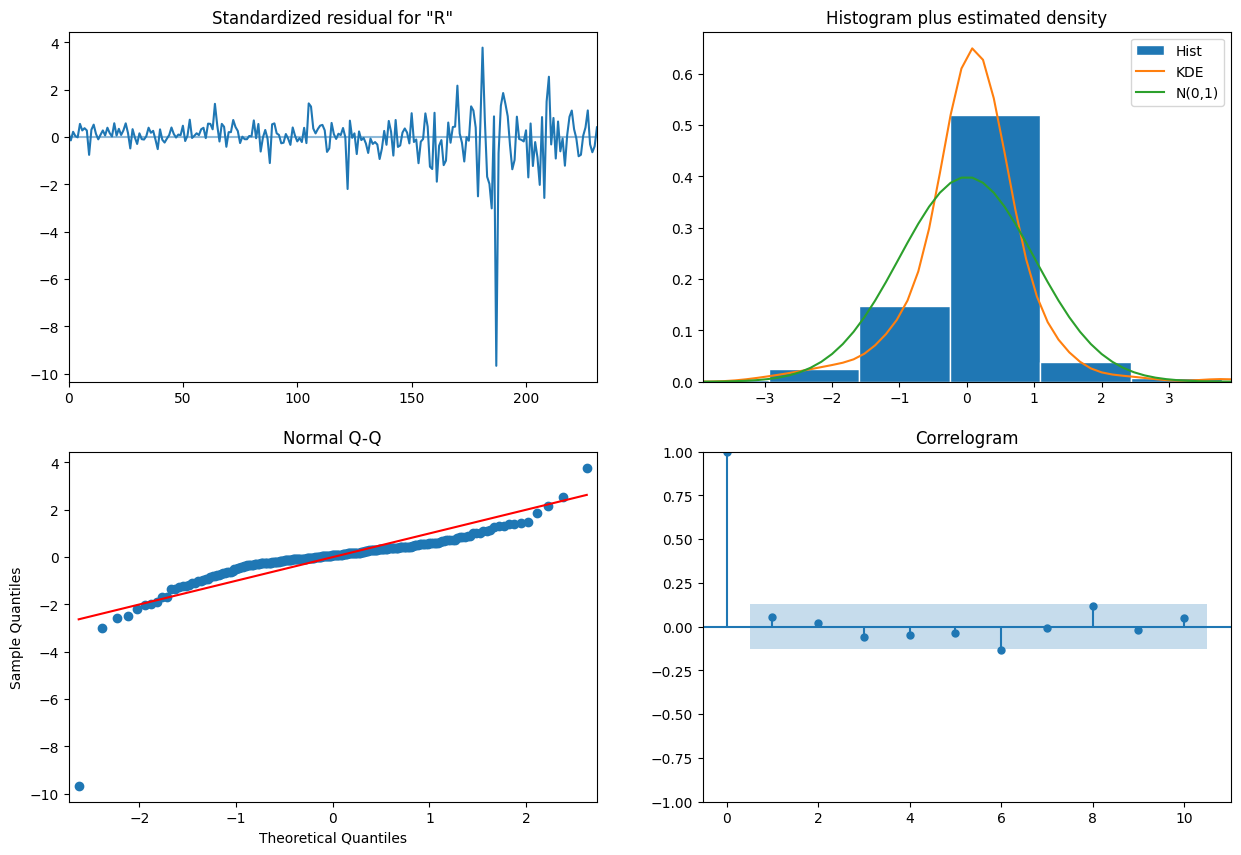

In [ ]:
ARMA_model.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=YNDX_for_models["Returns"].dropna(), mode='lines', name='Исходный ряд доходностей'),
)

fig.add_trace(
    go.Scatter(x=YNDX_for_models.index, y=ARMA_model.predict(), mode='lines', name='ARMA predict'),
)


fig.update_layout(height=700,
                  width=1000,
                  margin=dict(l=20, r=20, t=30, b=20),
                  paper_bgcolor="LightSteelBlue",
                  title_text=f"Сравнение исходных доходностей и предсказания модели ARMA{arma_params}"
)
fig.show()

In [ ]:
YNDX_new = pd.read_csv(
    "YNDX_NEW.csv",
    delimiter=';',
    parse_dates=['<DATE>'])

YNDX_new = YNDX_new[['<DATE>', '<CLOSE>']]

daily_returns_1 = YNDX_new['<CLOSE>'].pct_change()
YNDX_new['Returns'] = daily_returns_1
YNDX_new.dropna(how = 'any', inplace = True)
YNDX_new

,<DATE>,<CLOSE>,Returns
1,2022-06-02,1592.0,0.003783
2,2022-06-03,1497.0,-0.059673
3,2022-06-06,1399.8,-0.064930
4,2022-06-07,1438.0,0.027290
5,2022-06-08,1456.2,0.012656


In [ ]:
n = len(YNDX_new)

ARMA_model_forecast = ARMA_model.forecast(n)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=YNDX_new.index, y=YNDX_new["Returns"], mode='lines+markers', name='Исходный ряд'),
)
fig.add_trace(
    go.Scatter(x=YNDX_new.index, y=ARMA_model_forecast, mode='lines+markers', name='ARMA'),
)

fig.update_layout(height=700, width=1500, title_text=f"Сравнение предсказаний моделей")
fig.show()